In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def cnn_model(input_size=(128, 128, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_size),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='softmax')  # Changed to 8 classes for classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Data preparation with ImageDataGenerator
def load_data():
    # Assuming you have a directory with subfolders for each class (train, valid, test)
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Use 20% of the data for validation

    train_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/train',  # Train directory path
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',  # For multi-class classification
        subset='training'
    )

    valid_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/train',  # Same train directory used for validation split
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',  # For multi-class classification
        subset='validation'
    )

    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test',  # Test directory path
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'  # For multi-class classification
    )

    return train_generator, valid_generator, test_generator


In [ ]:
model = cnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,672 (12.61 MB)

 Trainable params: 3,305,672 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_generator, valid_generator, test_generator = load_data()

# Train the model
model.fit(train_generator, epochs=10, validation_data=valid_generator,
          steps_per_epoch=train_generator.samples // train_generator.batch_size,
          validation_steps=valid_generator.samples // valid_generator.batch_size)


Found 1326 images belonging to 8 classes.
Found 330 images belonging to 8 classes.
Found 72 images belonging to 8 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.1615 - loss: 2.0033 - val_accuracy: 0.3531 - val_loss: 1.5063
Epoch 2/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 39s 980ms/step - accuracy: 0.2188 - loss: 1.6606

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2188 - loss: 1.6606 - val_accuracy: 0.0000e+00 - val_loss: 1.9421
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4165 - loss: 1.4591 - val_accuracy: 0.5625 - val_loss: 1.1713
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4062 - loss: 1.4466 - val_accuracy: 0.2000 - val_loss: 1.3880
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5116 - loss: 1.1876 - val_accuracy: 0.8188 - val_loss: 0.6855
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6875 - loss: 0.8833 - val_accuracy: 0.6000 - val_loss: 0.7224
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6837 - loss: 0.8896 - val_accuracy: 0.6969 - val_loss: 0.8391
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.3750 - loss: 1.5981 - val_accuracy: 0.7000 - val_loss: 0.8049
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7211 - loss: 0.8079 - val_accuracy: 0.9000 - val_loss: 0.4

In [ ]:
model.save('metal_surface_defects_model.h5')

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8533 - loss: 0.4931
Test accuracy: 0.85


In [ ]:
def predict_image(model, image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_array = tf.keras.preprocessing.image.img_to_array(image)
    input_array = np.expand_dims(input_array, axis=0) / 255.0

    prediction = model.predict(input_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the actual label
    class_labels = list(test_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the original image and the prediction result
    plt.imshow(image)
    plt.title(f'Prediction: {predicted_label}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


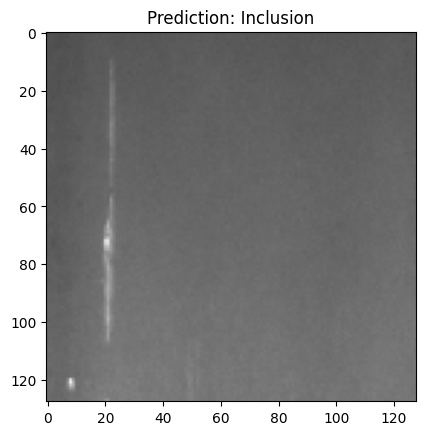

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


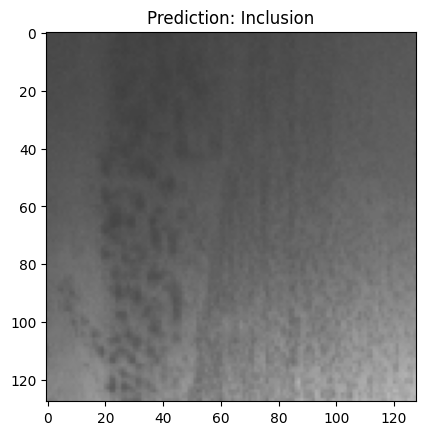

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


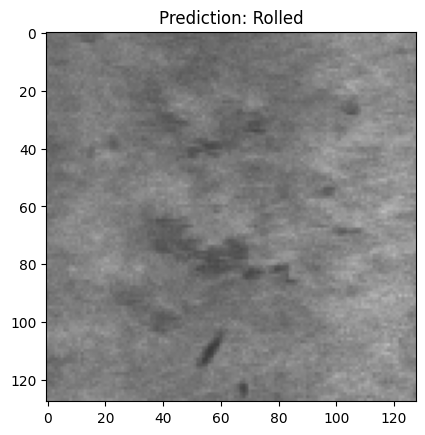

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


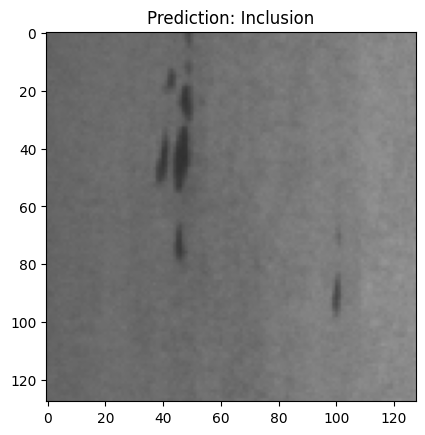

In [ ]:
# Load the saved model (when you want to use it for predictions)
model = load_model('metal_surface_defects_model.h5')

# Test the prediction with a sample image (make sure the image path is correct)
# Test the prediction with the correct image path
predict_image(model, r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Scratches/Sc_1.bmp")

predict_image(model, r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Pitted/PS_1.bmp")

# Test the prediction with the correct image path
predict_image(model, r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Rolled/RS_10.bmp")

predict_image(model, r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Inclusion/In_10.bmp")







In [ ]:
import os

image_path = r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Patches/Pa_10.bmp"
print(os.path.exists(image_path))  # This will return True if the file exists, False otherwise.

True
